### 单层感知机
- 解决线性可分的问题
- 无法解决亦或(xor)问题
- 假设数据半径为$r$, 有一个余量$\rho$分类两类
$$y(\mathbf{x^Tw} + b) \geq \rho$$
- 对于$\|\mathbf{w}\|^2 + b^2 \leq 1$
- 感知机在$\frac{r^2 + 1}{\rho^2}$步后收敛

### 多层感知机(multilayer perceptron)
- 隐藏层的大小是一个超参数
- 隐藏层的设计一般是从大到小，尽量避免把输入直接压倒很小的维度，防止损失很多信息
- 也可以在得到输出之前先extend一下， 就是把维度再扩大一下然后再缩小维度，或者直接输出

<img src="images/10_image_1.png" height='200'>

- 必须引入激活函数，解决非线性的问题，激活函数必须是非线性的，因为如果激活函数是线性的，数据在网络前向推理的过程中进行的就是矩阵的乘法，最后的输出仍然是一个经过了多次变换的线性模型，仍然无法解决非线性问题，因此引入非线性的激活函数是必要的
#### 常见的激活函数
- sigmoid函数
$$\sigma(x) = \frac{1}{1 + \exp{(-x)}}$$

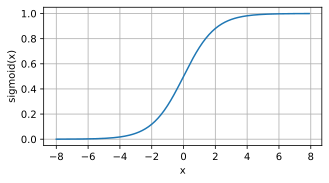

In [5]:
%matplotlib inline
from d2l import torch as d2l
import torch
import matplotlib.pyplot as plt

x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.sigmoid(x)
d2l.plot(x.detach().numpy(), y.detach().numpy(), 'x', 'sigmoid(x)', figsize=(5, 2.5)) 

###  MLP从零开始实现

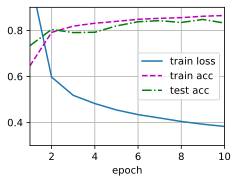

In [3]:
from d2l import torch as d2l
from torch import nn
import torch

# load the dataloader
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)


# initial the parameters of the model
num_inputs, num_outputs, num_hiddens = 784, 10, 256
W1 = nn.Parameter(
    torch.randn((num_inputs, num_hiddens), requires_grad=True) * 0.01
    )
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(
    torch.randn((num_hiddens, num_outputs), requires_grad=True) * 0.01
    )
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

# define the activation function
def relu(X):
    return torch.clamp(X, min=0)

# define the model
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu((X @ W1) + b1)
    return (H @ W2 + b2)

# define the optimizer
lr = 0.1
trainer = torch.optim.SGD([W1, b1, W2, b2], lr=lr)

# define the loss function
loss = nn.CrossEntropyLoss(reduction='none')

# train
num_epochs = 10
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)



### MLP 简洁实现

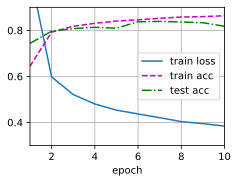

In [5]:
import torch
from torch import nn
from d2l import torch as d2l

# get the data loader
batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

# define the model
num_inputs, num_outputs, num_hiddens = 784, 10, 256
net = nn.Sequential(
    nn.Flatten(),
    nn.Linear(num_inputs, num_hiddens),
    nn.ReLU(),
    nn.Linear(num_hiddens, num_outputs)
)

# init the weights
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
net.apply(init_weights)

# define the loss
loss = nn.CrossEntropyLoss(reduction='none')

# define the optimizer and train the model
num_epochs, lr = 10, 0.1
trainer = torch.optim.SGD(net.parameters(), lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)
